# Most agentful and benefactive characters - All Characters

In [17]:
import os
import pandas as pd

In [18]:
dirs = []
for folders in os.listdir("../in/manually_corrected"):
    for files in os.listdir("../out/" + folders):
        dirs.append(folders+"/"+files)

FileNotFoundError: [Errno 2] No such file or directory: '../out/Middlemarch'

In [22]:
max_actors = []
max_bene = []

# For all novels
for folder in os.listdir("../in/manually_corrected"):
    path = "../in/manually_corrected/" + folder + "/"
    # if this is a directory
    if os.path.isdir(path):
        # read filenames
        for filename in os.listdir(path):
            
            # find max Actors, adding novel title 
            if filename.endswith("-joined-actors.csv"):
                #print(filename)
                df = pd.read_csv(path+filename, header=0)
                #print(df)
                df["novel"] = folder
                df["percentage"] = df["percentage"].astype(float)
                most = df.iloc[df["percentage"].idxmax()].values
                max_actors.append(tuple(most))
                
            
            # find max Benefactors, adding novel title 
            elif filename.endswith("-joined-benefactors.csv"):
                #print(filename)
                df = pd.read_csv(path+filename, header=0)
                #print(df)
                df["novel"] = folder
                df["percentage"] = df["percentage"].astype(float)
                most = df.iloc[df["percentage"].idxmax()].values
                max_bene.append(tuple(most))

In [23]:
# Create DataFrames from lists
max_all_actors = pd.DataFrame(max_actors, columns=['name', 'percentage','role', 'author', 'novel'])
max_all_bene = pd.DataFrame(max_bene, columns=['name', 'percentage', 'role', 'author','novel'])

In [24]:
# Sort DataFrames - here by percentage but later by year?
max_all_actors = max_all_actors.sort_values(by = "percentage", ascending=True)
max_all_bene = max_all_bene.sort_values(by = "percentage", ascending=True)

In [30]:
max_all_actors

,name,percentage,role,author,novel
26,Lucretia,6.441943,"heiress, ward",male,Lucretia
7,Mrs_Rayland,6.451532,heiress,female,TheOldManorHouse
0,Dorothea,6.785398,"heiress, ward",female,Middlemarch
24,Adela_Waltham,8.242064,NaN,male,Demos
21,George_Venables,8.432900,suitor,female,Maria
15,Captain_Booth,9.235157,"unmoneyed, suitor",female,Amelia
3,Emmeline,9.797508,heiress,female,Emmeline
9,Tom_Jones,9.808552,"heir, suitor",male,Tom Jones
2,Nicodemus_Boffin,10.556698,heir,male,Our Mutual Friend
14,Sir_Percival,10.648231,NaN,male,The Woman in White


In [42]:
max_all_actors = max_all_actors[~max_all_actors["name"].isin(["Roderick_Random", "Gabriel_Outcast", "Maud", "Jane", "Pip"])]

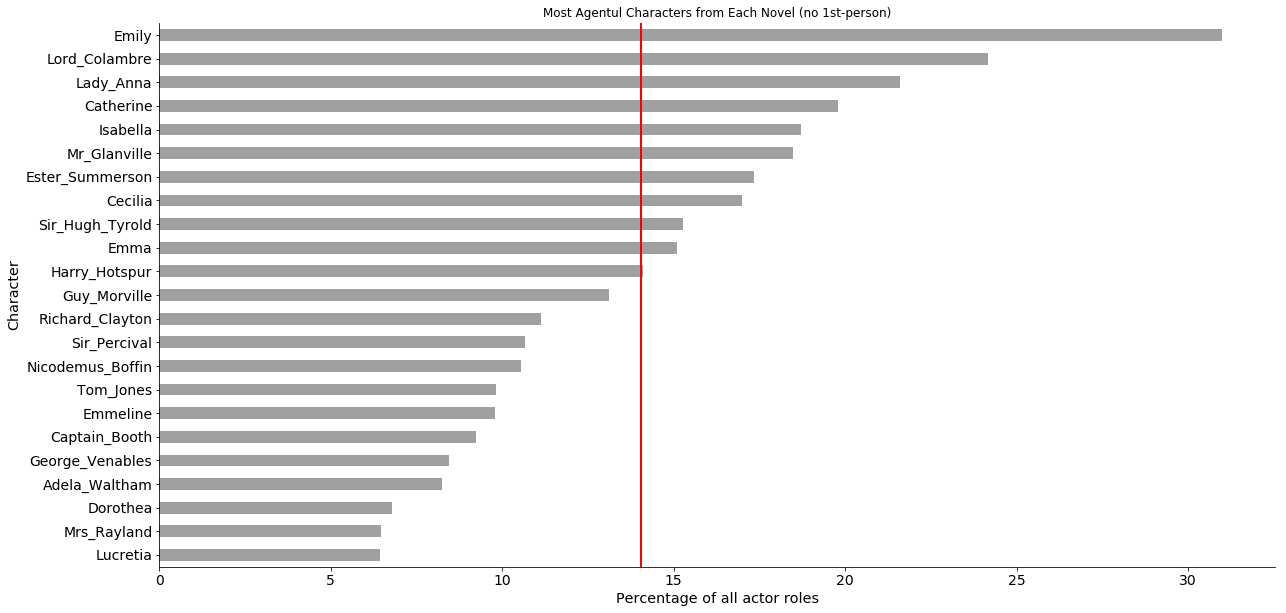

In [43]:
# Plot all max Actors across novels, with red line showing mean
ax = max_all_actors.plot(kind="barh", x="name", y="percentage",
                         figsize=(20,10), color="grey", alpha=0.75, legend=False,
                         fontsize=14, title="Most Agentul Characters from Each Novel (no 1st-person)")

ax.axvline(max_all_actors["percentage"].mean(), color='red', linewidth=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel("Character", rotation=90, fontsize="x-large")
ax.set_xlabel("Percentage of all actor roles",fontsize="x-large")

ax.figure.savefig("/Users/au564346/Desktop/most_agentful_all_no1st.png", dpi=300, bbox_inches = "tight")

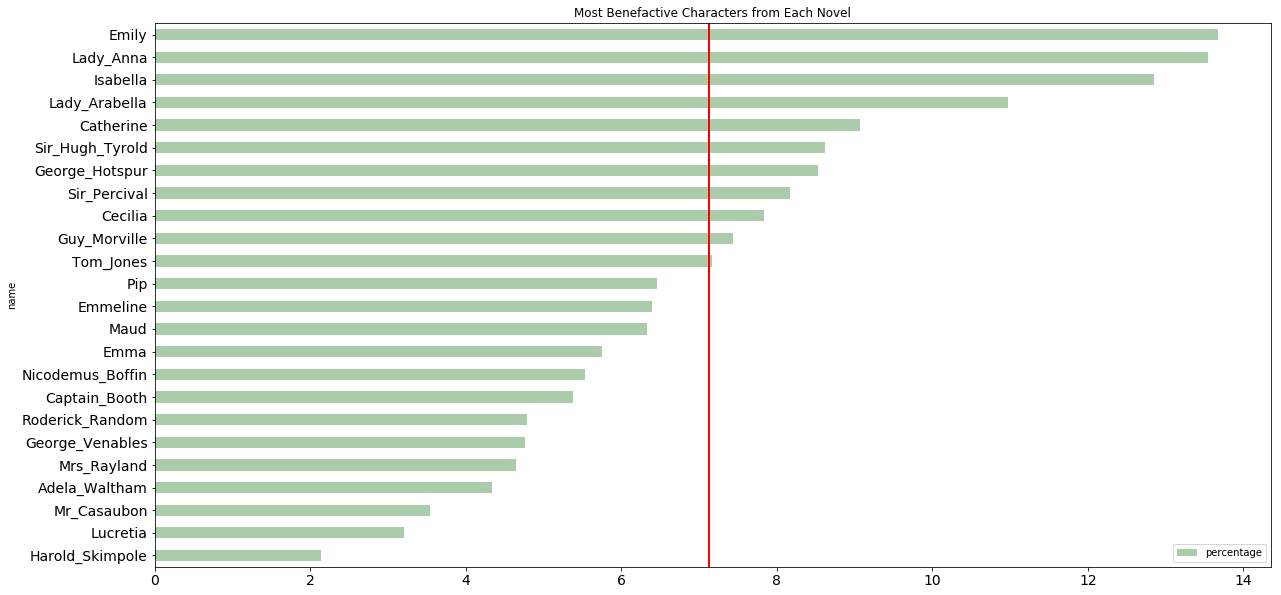

In [30]:
# Plot all max Benefactors across novels, with red line showing mean
ax2=max_all_bene.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="Most Benefactive Characters from Each Novel")
ax.axvline(max_all_actors["percentage"].mean(), color='red', linewidth=2)
ax2.axvline(max_all_bene["percentage"].mean(), color='red', linewidth=2)
ax.figure.savefig("../viz/all_characters/most_benefactive.png")

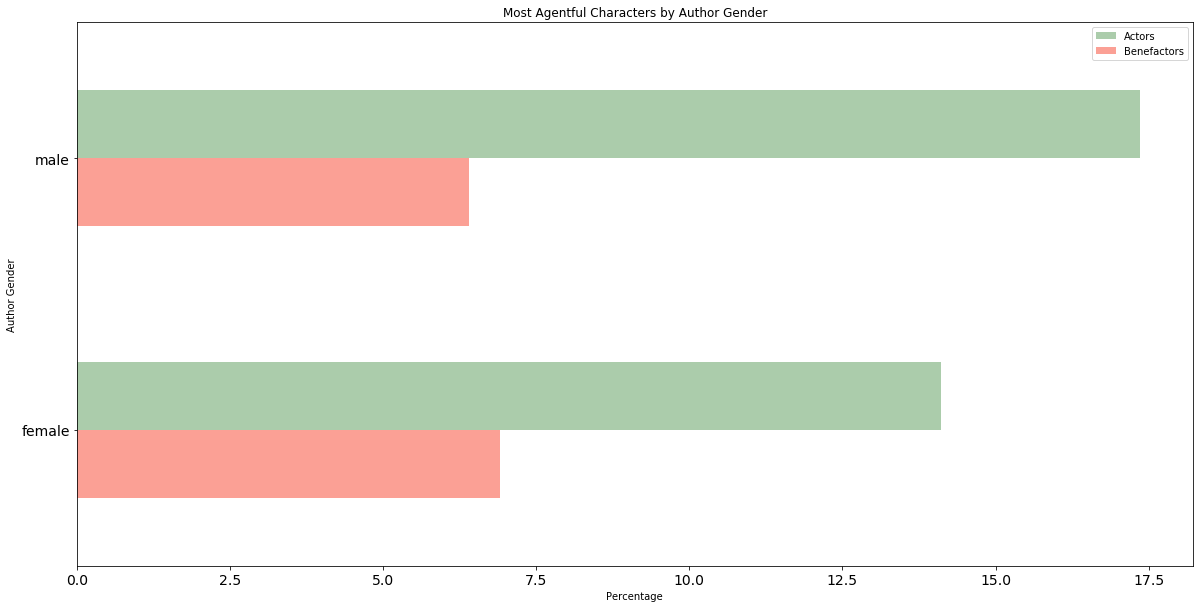

In [28]:
actor_all_groupby_genre = max_all_actors.groupby("author").median()
bene_all_groupby_genre = max_all_bene.groupby("author").median()

df = pd.DataFrame({"Benefactors":bene_all_groupby_genre["percentage"],"Actors":actor_all_groupby_genre["percentage"]})
df.sort_values(by = ["Actors", "Benefactors"], ascending=False)
ax = df.plot(kind="barh",figsize=(20,10), color=["salmon","darkseagreen"], fontsize=14, alpha=0.75, legend='reverse', title="Most Agentful Characters by Author Gender")
ax.set_xlabel("Percentage")
ax.set_ylabel("Author Gender")

ax.figure.savefig("../viz/all_characters/all-by-author-gender.png")

# Most agentful and benefactive characters - Only Heiresses

To be done at our meeting on Friday

In [24]:
heiress_actors = []
heiress_bene = []

# For all novels
for folder in os.listdir("../in/manually_corrected"):
    path = "../in/manually_corrected/" + folder + "/"
    print(path)
    # if this is a directory
    if os.path.isdir(path):
        # read filenames
        for filename in os.listdir(path):
            
            # find max Actors, adding novel title 
            if filename.endswith("-joined-actors.csv"):
                df = pd.read_csv(path+filename, header=0, sep=",")
                df["novel"] = folder
                df.dropna(inplace=True)
                # if character is heiress
                heiress = df.loc[df["role"].str.contains("heiress")].values
                heiress_actors.append(list(map(tuple, heiress)))
                    
            # find max Benefactors, adding novel title 
            elif filename.endswith("-joined-benefactors.csv"):
                df = pd.read_csv(path+filename, header=0, sep=",")
                df["novel"] = folder
                df.dropna(inplace=True)
                heiress = df[df["role"].str.contains("heiress")].values
                heiress_bene.append(list(map(tuple, heiress)))

../in/manually_corrected/Middlemarch/
../in/manually_corrected/GreatExpectations/
../in/manually_corrected/Our Mutual Friend/
../in/manually_corrected/Emmeline/
../in/manually_corrected/Camilla/
../in/manually_corrected/LadyAnna/
../in/manually_corrected/Castle Rackrent/
../in/manually_corrected/TheCastleofOtranto/
../in/manually_corrected/TheOldManorHouse/
../in/manually_corrected/Inheritance of Evil/
../in/manually_corrected/Tom Jones/
../in/manually_corrected/LeFanu_Uncle_Silas/
../in/manually_corrected/RoderickRandom/
../in/manually_corrected/Northanger Abbey/
../in/manually_corrected/Jane Eyre/
../in/manually_corrected/The Woman in White/
../in/manually_corrected/Amelia/
../in/manually_corrected/TheAbsentee/
../in/manually_corrected/TheFemaleQuixote/
../in/manually_corrected/TheHeirofRedclyffe/
../in/manually_corrected/The Mysteries of Udolpho/


ParserError: Error tokenizing data. C error: Expected 4 fields in line 4, saw 5


In [20]:
heiress_actors = [item for sublist in heiress_actors for item in sublist]
heiress_bene = [item for sublist in heiress_bene for item in sublist]

In [21]:
heiress_actors

[]

In [33]:
# Create DataFrames from lis
max_heiress_actors = pd.DataFrame(heiress_actors, columns=['name', 'percentage','role', 'author', 'novel'])
max_heiress_bene = pd.DataFrame(heiress_bene, columns=['name', 'percentage', 'role', 'author', 'novel'])

In [34]:
# Sort DataFrames - here by percentage but later by year?
max_heiress_actors = max_heiress_actors.sort_values(by = "percentage", ascending=True)
max_heiress_bene = max_heiress_bene.sort_values(by = "percentage", ascending=True)

# year
#max_heiress_actors = max_heiress_actors.sort_values(by=['year'])
#max_heiress_bene = max_heiress_bene.sort_values(by=['year'])
#max_heiress_bene["year"] = max_heiress_bene["year"].astype(int)

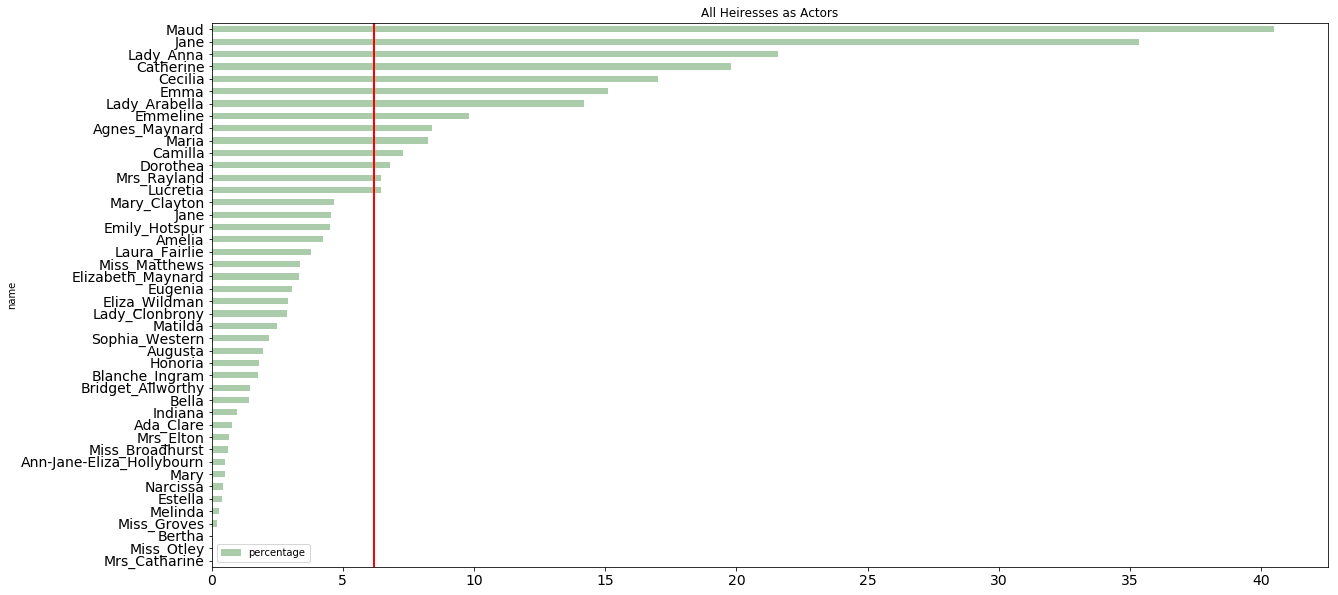

In [36]:
# Plot all max Actors across novels, with red line showing mean
ax = max_heiress_actors.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heiresses as Actors")
ax.axvline(max_heiress_actors["percentage"].mean(), color='red', linewidth=2)
ax.figure.savefig("../viz/heiresses/all-heiresses-Actors.png")

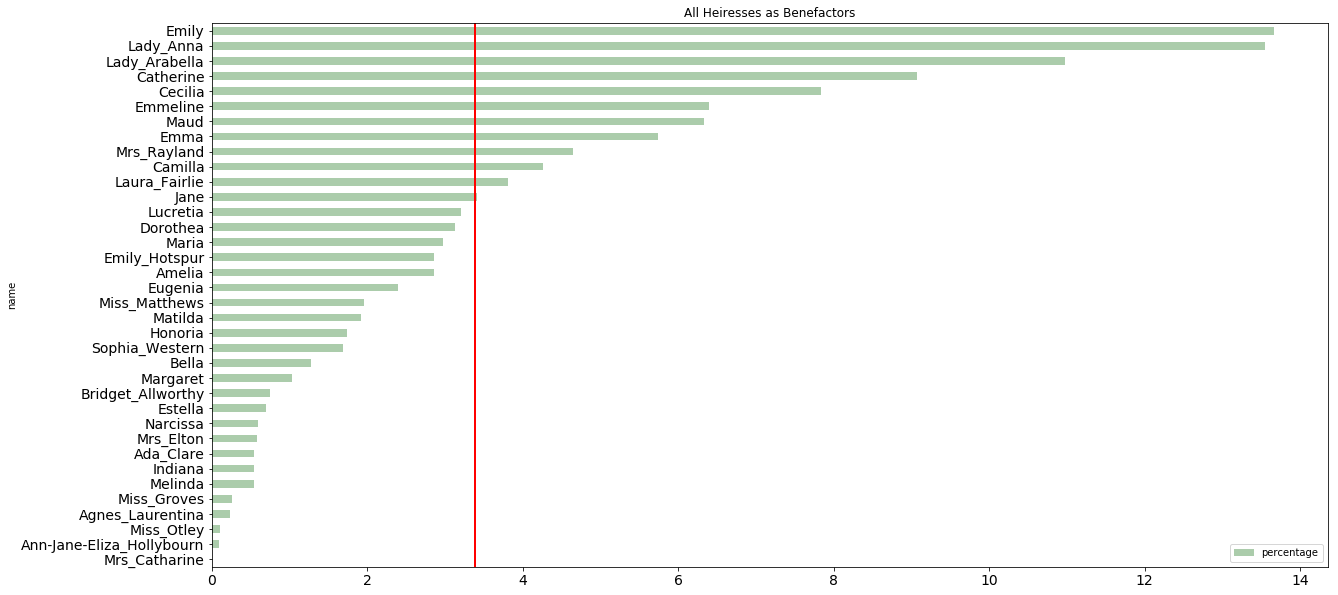

In [37]:
# Plot all max Benefactors across novels, with red line showing mean
ax2= max_heiress_bene.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heiresses as Benefactors")
ax2.axvline(max_heiress_bene["percentage"].mean(), color='red', linewidth=2)
ax2.figure.savefig("../viz/heiresses/all-heiresses-Benefactors.png")

In [38]:
max_heiress_actors["author"] = max_heiress_actors["author"].apply(lambda x: x.replace('femalefemale', 'female'))
max_heiress_bene["author"] = max_heiress_bene["author"].apply(lambda x: x.replace('femalefemale', 'female'))

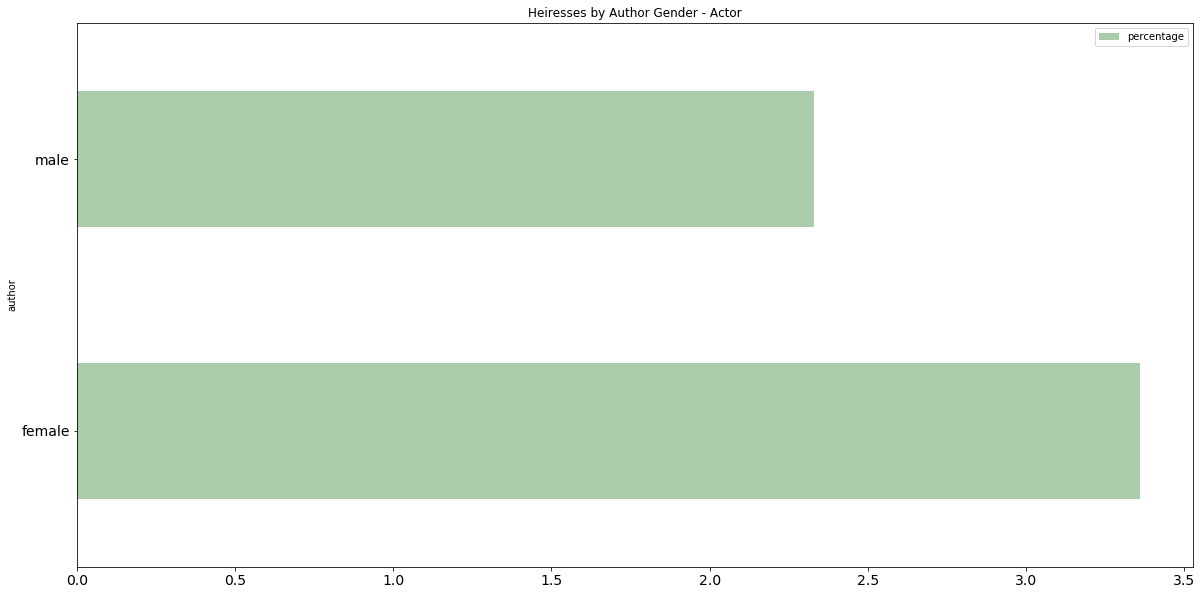

In [39]:
plt = max_heiress_actors.groupby("author").median().plot(kind="barh", y="percentage",figsize=(20,10), color="darkseagreen", fontsize=14, alpha=0.75, title="Heiresses by Author Gender - Actor")
plt.figure.savefig("../viz/heiresses/heiresses-by-author-gender-Actors.png")

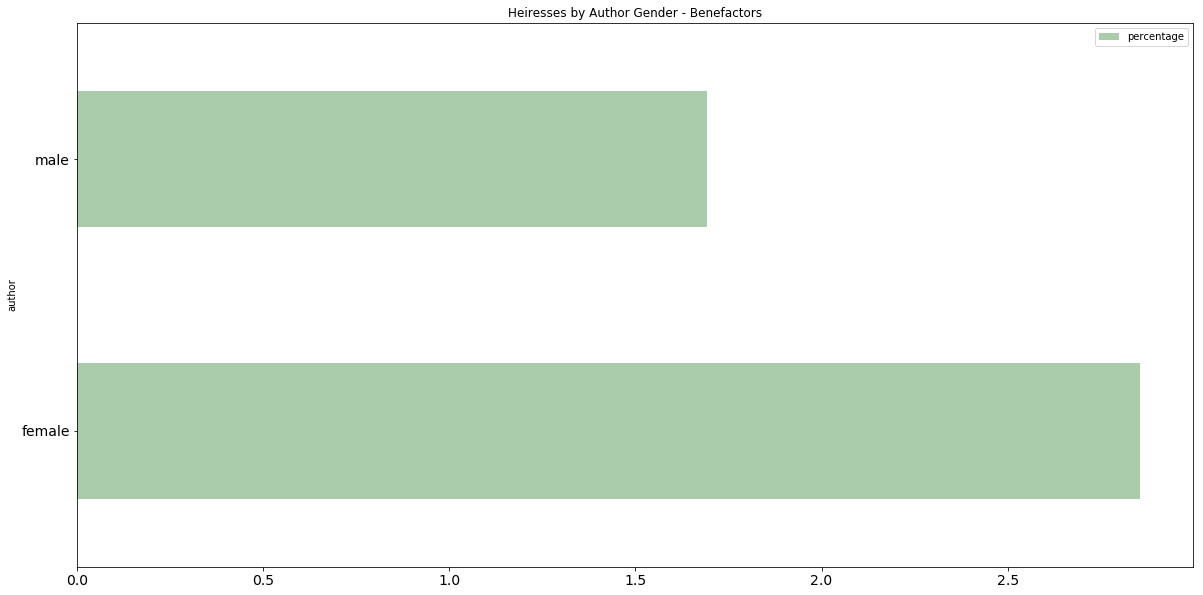

In [40]:
plt = max_heiress_bene.groupby("author").median().plot(kind="barh", y="percentage",figsize=(20,10), color="darkseagreen", fontsize=14, alpha=0.75, title="Heiresses by Author Gender - Benefactors")
plt.figure.savefig("../viz/heiresses/heiresses-by-author-gender-Benefactors.png")

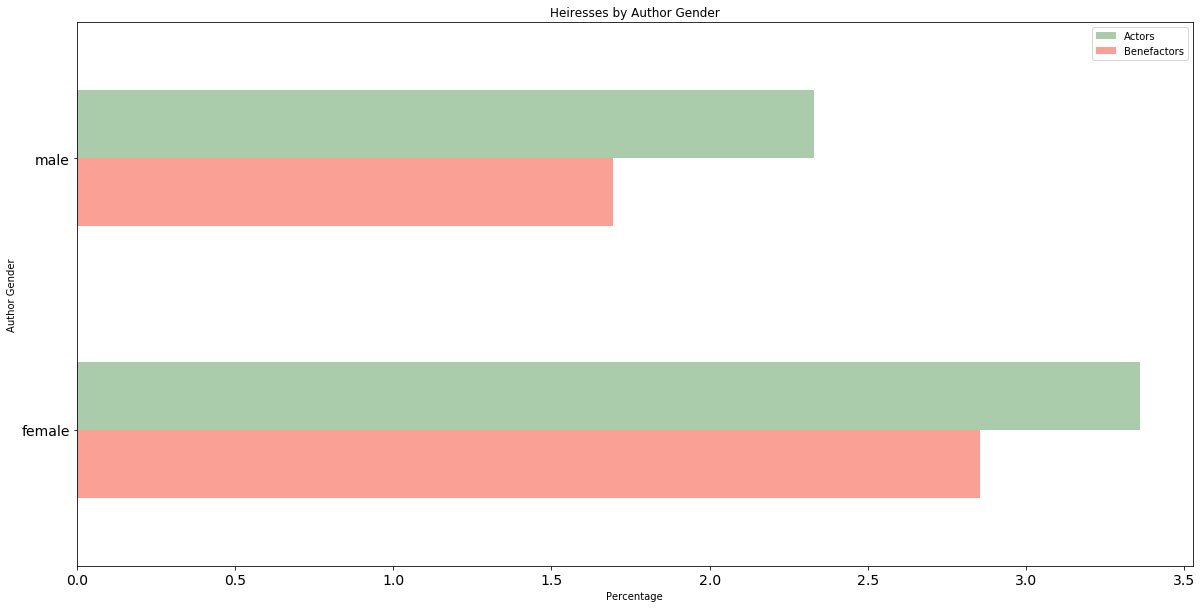

In [41]:
actor_heiress_groupby_genre = max_heiress_actors.groupby("author").median()
bene_heiress_groupby_genre = max_heiress_bene.groupby("author").median()

df = pd.DataFrame({"Benefactors":bene_heiress_groupby_genre["percentage"],"Actors":actor_heiress_groupby_genre["percentage"]})
df.sort_values(by = ["Actors", "Benefactors"], ascending=False)
ax = df.plot(kind="barh",figsize=(20,10), color=["salmon","darkseagreen"], fontsize=14, alpha=0.75, legend='reverse', title="Heiresses by Author Gender")
ax.set_xlabel("Percentage")
ax.set_ylabel("Author Gender")

ax.figure.savefig("../viz/heiresses/heiresses-by-author-gender.Both.png")

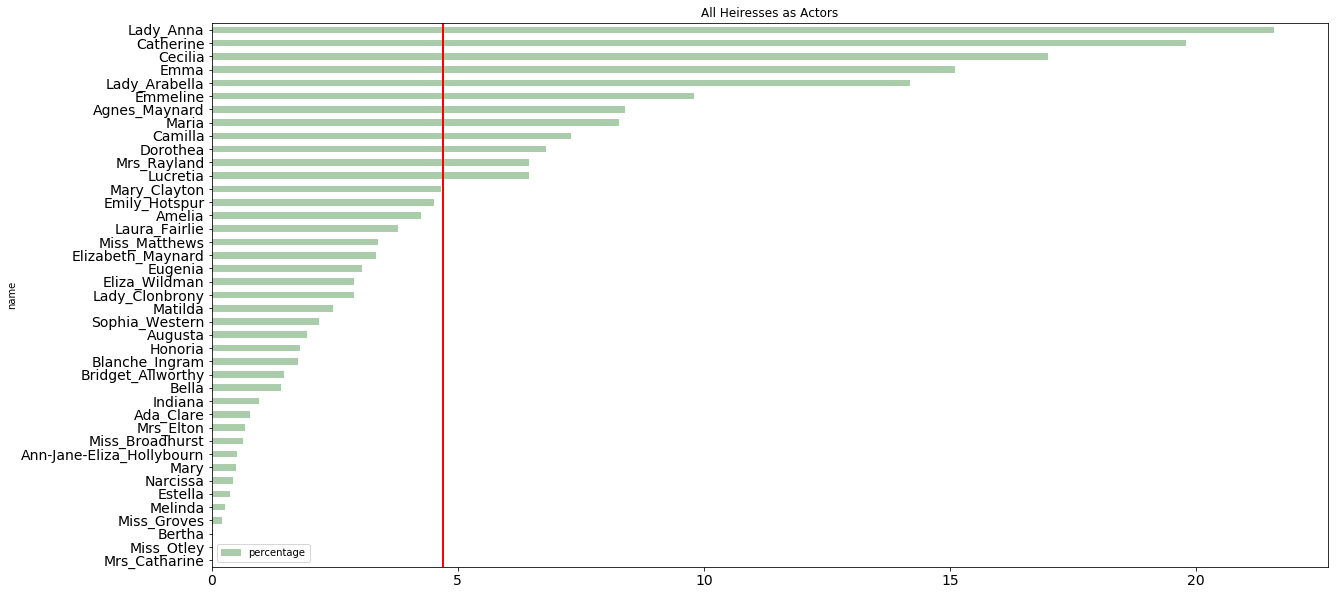

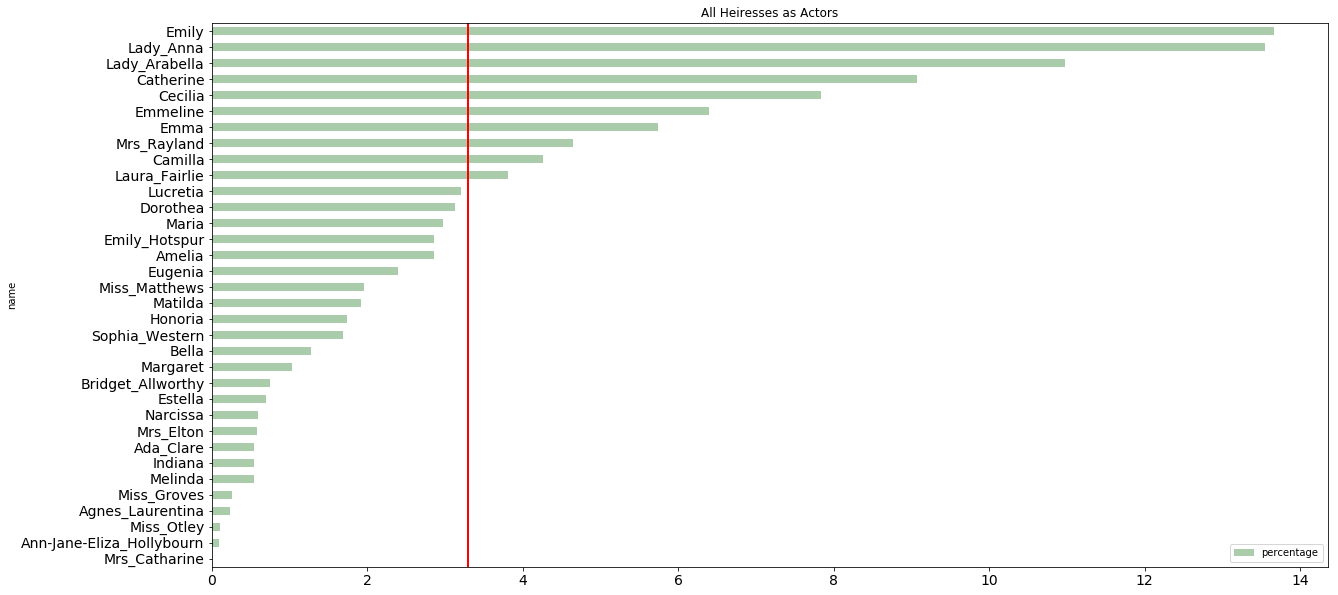

In [43]:
max_heiress_actors = max_heiress_actors[max_heiress_actors["name"] != "Maud"]
max_heiress_actors = max_heiress_actors[max_heiress_actors["name"] != "Jane"]

max_heiress_bene = max_heiress_bene[max_heiress_bene["name"] != "Maud"]
max_heiresss_bene = max_heiress_bene[max_heiress_bene["name"] != "Jane"]

# Plot all max Actors across novels, with red line showing mean
ax = max_heiress_actors.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heiresses as Actors")
ax.axvline(max_heiress_actors["percentage"].mean(), color='red', linewidth=2)
ax.figure.savefig("../viz/heiresses/no-1st-person-all-heiresses-Actors.png")

# Plot all max Actors across novels, with red line showing mean
ax = max_heiresss_bene.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heiresses as Actors")
ax.axvline(max_heiresss_bene["percentage"].mean(), color='red', linewidth=2)
ax.figure.savefig("../viz/heiresses/no-1st-person-all-heiresses-Benefactors.png")


#actor_heiress_groupby_genre = max_heiress_actors.groupby("author").median()
#bene_heiress_groupby_genre = max_heiress_bene.groupby("author").median()
#df = pd.DataFrame({"Benefactors":bene_heiress_groupby_genre["percentage"],"Actors":actor_heiress_groupby_genre["percentage"]})
#df.sort_values(by = ["Actors", "Benefactors"], ascending=False)
#ax = df.plot(kind="barh",figsize=(20,10), color=["salmon","darkseagreen"], fontsize=14, alpha=0.75, legend='reverse', title="Heiresses by Author Gender - No 1st Person")
#ax.set_xlabel("Perentage")
#ax.set_ylabel("Author Gender")
#ax.figure.savefig("../viz/heiresses/no-1stPer-heiress-by-author-gender.Both.png")

# Only heirs

In [42]:
heirs_actors = []
heirs_bene = []

# For all novels
for folder in os.listdir("../in/manually_corrected/"):
    path = "../in/manually_corrected/" + folder + "/"
    print(path)
    # if this is a directory
    if os.path.isdir(path):
        # read filenames
        for filename in os.listdir(path):
            
            # find max Actors, adding novel title 
            if filename.endswith("-joined-actors.csv"):
                df = pd.read_csv(path+filename, header=0)
                df["novel"] = folder
                df.dropna(inplace=True)
                # if character is heiress
                heiress = df.loc[df["role"].str.contains("heir")].values
                heirs_actors.append(list(map(tuple, heiress)))
                    
            # find max Benefactors, adding novel title 
            elif filename.endswith("-joined-benefactors.csv"):
                df = pd.read_csv(path+filename, header=0)
                df["novel"] = folder
                df.dropna(inplace=True)
                heiress = df[df["role"].str.contains("heir")].values
                heirs_bene.append(list(map(tuple, heiress)))

../in/manually_corrected/Middlemarch/
../in/manually_corrected/GreatExpectations/
../in/manually_corrected/Our Mutual Friend/
../in/manually_corrected/Emmeline/
../in/manually_corrected/Camilla/
../in/manually_corrected/LadyAnna/
../in/manually_corrected/Castle Rackrent/
../in/manually_corrected/TheCastleofOtranto/
../in/manually_corrected/TheOldManorHouse/
../in/manually_corrected/Inheritance of Evil/
../in/manually_corrected/Tom Jones/
../in/manually_corrected/LeFanu_Uncle_Silas/
../in/manually_corrected/RoderickRandom/
../in/manually_corrected/Northanger Abbey/
../in/manually_corrected/Jane Eyre/
../in/manually_corrected/The Woman in White/
../in/manually_corrected/Amelia/
../in/manually_corrected/TheAbsentee/
../in/manually_corrected/TheFemaleQuixote/
../in/manually_corrected/TheHeirofRedclyffe/
../in/manually_corrected/The Mysteries of Udolpho/
../in/manually_corrected/Emma/
../in/manually_corrected/Maria/
../in/manually_corrected/Cecilia/
../in/manually_corrected/Modern Times/
..

In [43]:
heirs_actors = [item for sublist in heirs_actors for item in sublist]
heirs_bene = [item for sublist in heirs_bene for item in sublist]

In [44]:
# Create DataFrames from lis
max_heirs_actors = pd.DataFrame(heirs_actors, columns=['name', 'percentage','role', 'author', 'novel'])
max_heirs_bene = pd.DataFrame(heirs_bene, columns=['name', 'percentage','role', 'author', 'novel'])

In [45]:
max_heirs_actors = max_heirs_actors[~max_heirs_actors["role"].str.contains("heiress")]
max_heirs_bene = max_heirs_bene[~max_heirs_bene["role"].str.contains("heiress")]

In [46]:
# Sort DataFrames - here by percentage but later by year?
max_heirs_actors = max_heirs_actors.sort_values(by = "novel", ascending=True)
max_heirs_bene = max_heirs_bene.sort_values(by = "novel", ascending=True)

In [48]:
max_heirs_bene.to_csv("../tables/with-1st-per/heir-bene.csv", index=0)

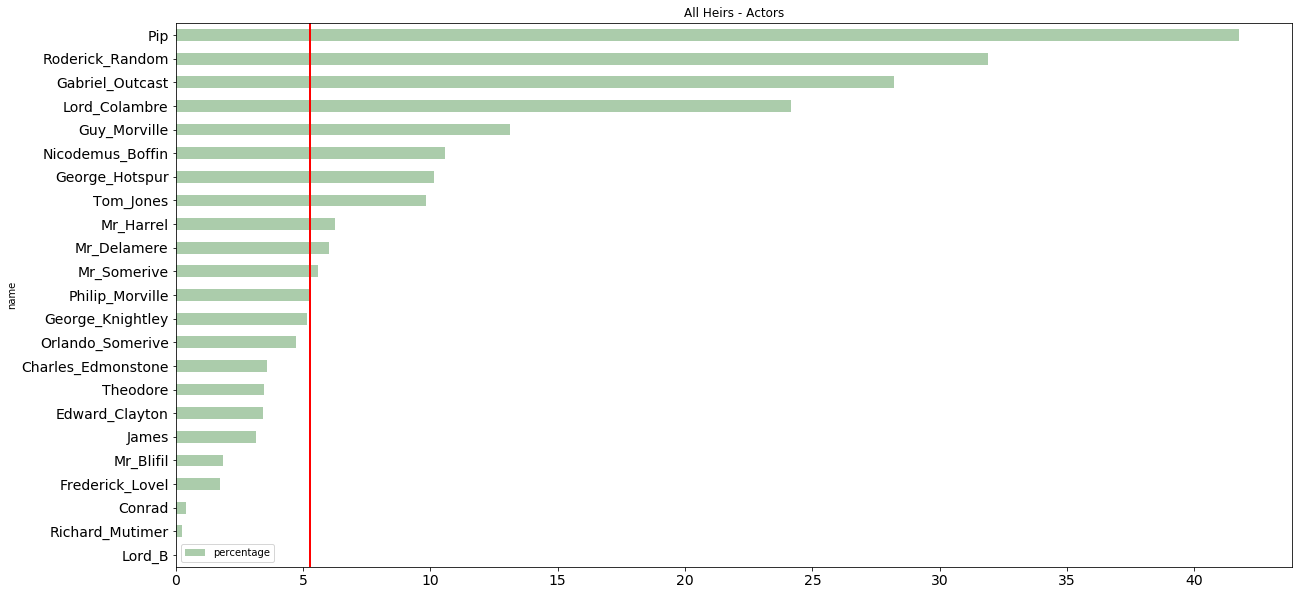

In [50]:
# Plot all max Actors across novels, with red line showing mean
ax = max_heirs_actors.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heirs - Actors")
ax.axvline(max_heirs_actors["percentage"].median(), color='red', linewidth=2)
ax.figure.savefig("../viz/heirs/all-heirs-Actors.png")

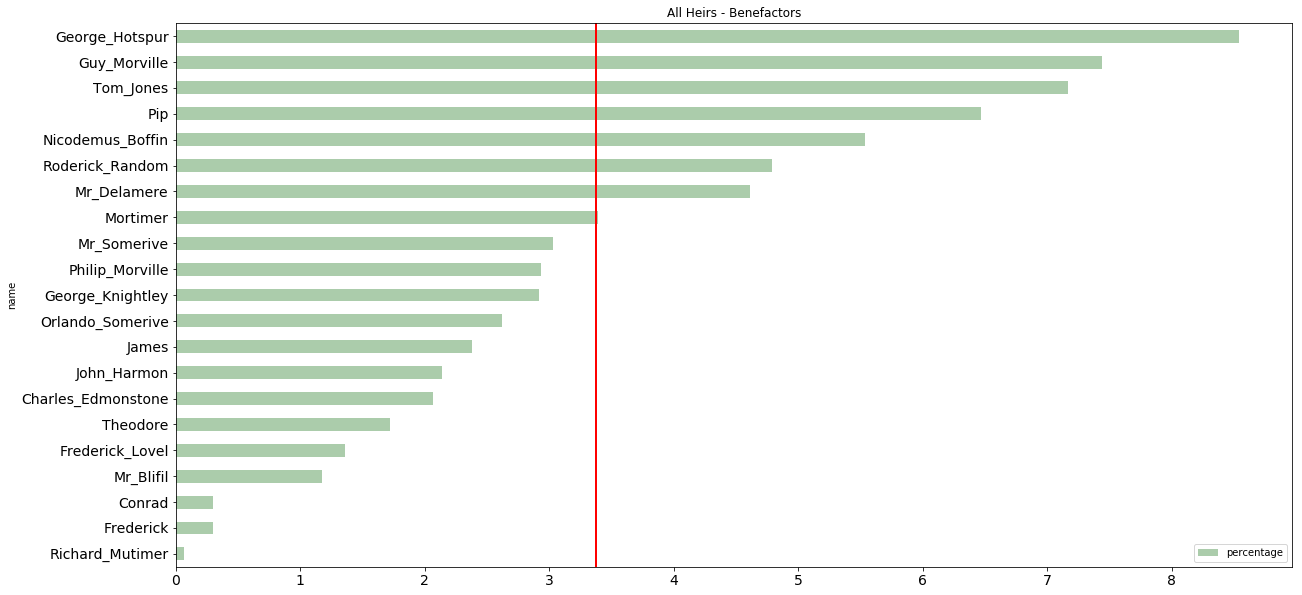

In [51]:
# Plot all max Benefactors across novels, with red line showing mean
ax2= max_heirs_bene.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heirs - Benefactors")
ax2.axvline(max_heirs_bene["percentage"].mean(), color='red', linewidth=2)
ax2.figure.savefig("../viz/heirs/all-heirs-Benefactors.png")

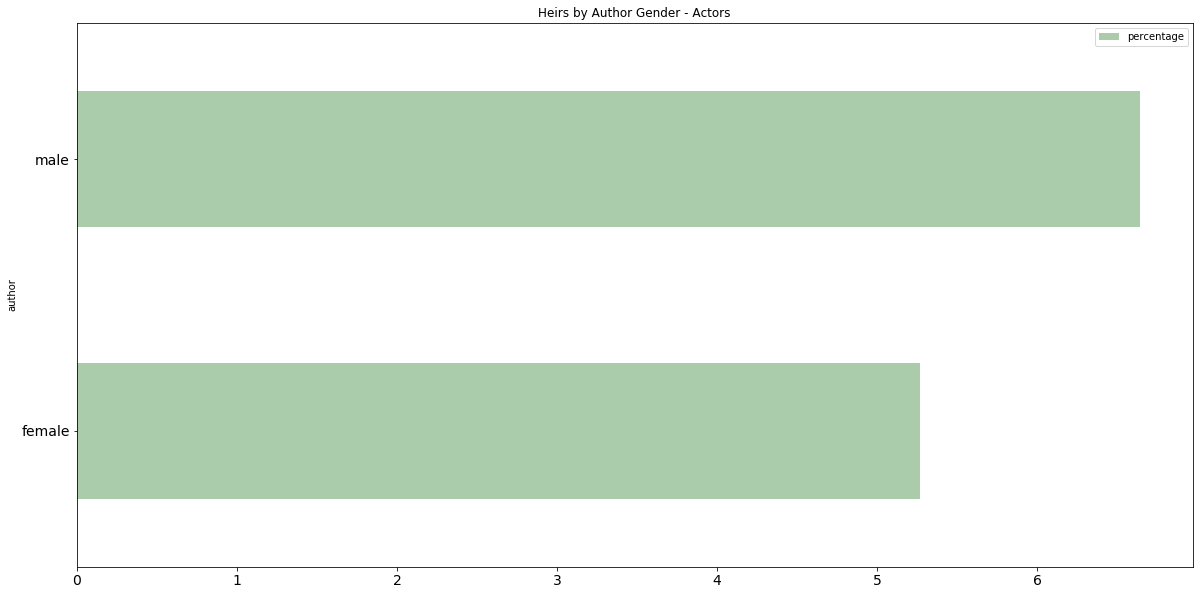

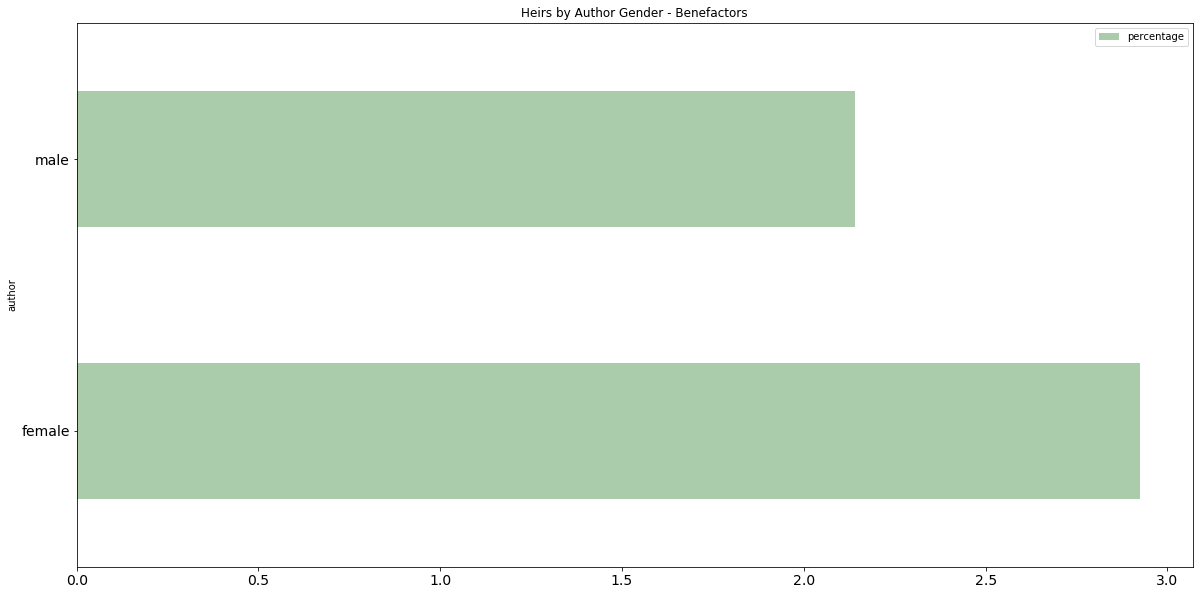

In [10]:
plt = max_heirs_actors.groupby("author").median().plot(kind="barh", y="percentage",figsize=(20,10), color="darkseagreen", fontsize=14, alpha=0.75, title="Heirs by Author Gender - Actors")
plt.figure.savefig("../viz/heirs/heirs-by-author-gender-Actors.png")

plt2 = max_heirs_bene.groupby("author").median().plot(kind="barh", y="percentage",figsize=(20,10), color="darkseagreen", fontsize=14, alpha=0.75, title="Heirs by Author Gender - Benefactors")
plt2.figure.savefig("../viz/heirs/heirs-by-author-gender-Benefactors.png")


In [11]:
actor_heirs_groupby_genre = max_heirs_actors.groupby("author").median()
bene_heirs_groupby_genre = max_heirs_bene.groupby("author").median()

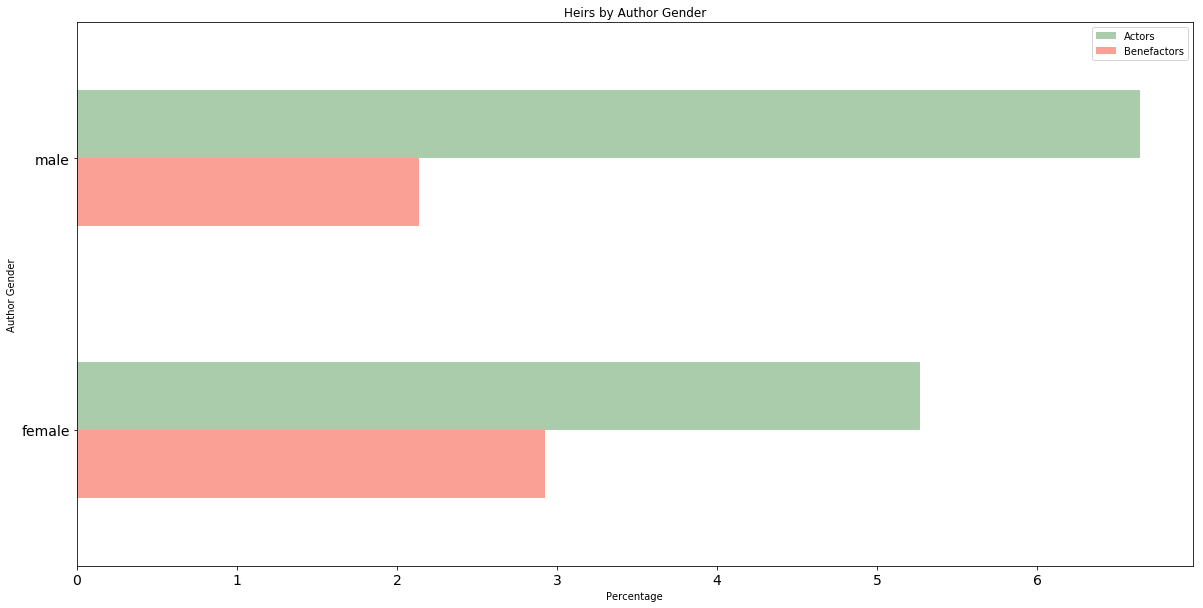

In [13]:
df = pd.DataFrame({"Benefactors":bene_heirs_groupby_genre["percentage"],"Actors":actor_heirs_groupby_genre["percentage"]})
df.sort_values(by = ["Actors", "Benefactors"], ascending=False)
ax = df.plot(kind="barh",figsize=(20,10), color=["salmon","darkseagreen"], fontsize=14, alpha=0.75, legend='reverse', title="Heirs by Author Gender")
ax.set_ylabel("Author Gender")
ax.set_xlabel("Percentage")

ax.figure.savefig("../viz/heirs/heirs-by-author-gender.Both.png")

In [ ]:
max_heirs_actors.sort_values(by = ["percentage"], ascending=False)

In [14]:
max_heirs_actors2 = max_heirs_actors[max_heirs_actors["name"] != "Pip"]
max_heirs_actors2 = max_heirs_actors2[max_heirs_actors2["name"] != "Roderick_Random"]
max_heirs_actors2 = max_heirs_actors2[max_heirs_actors2["name"] != "Gabriel_Outcast"]

In [16]:
max_heirs_bene2 = max_heirs_bene[max_heirs_bene["name"] != "Pip"]
max_heirs_bene2 = max_heirs_bene2[max_heirs_bene2["name"] != "Roderick_Random"]
max_heirs_bene2 = max_heirs_bene2[max_heirs_bene2["name"] != "Gabriel_Outcast"]

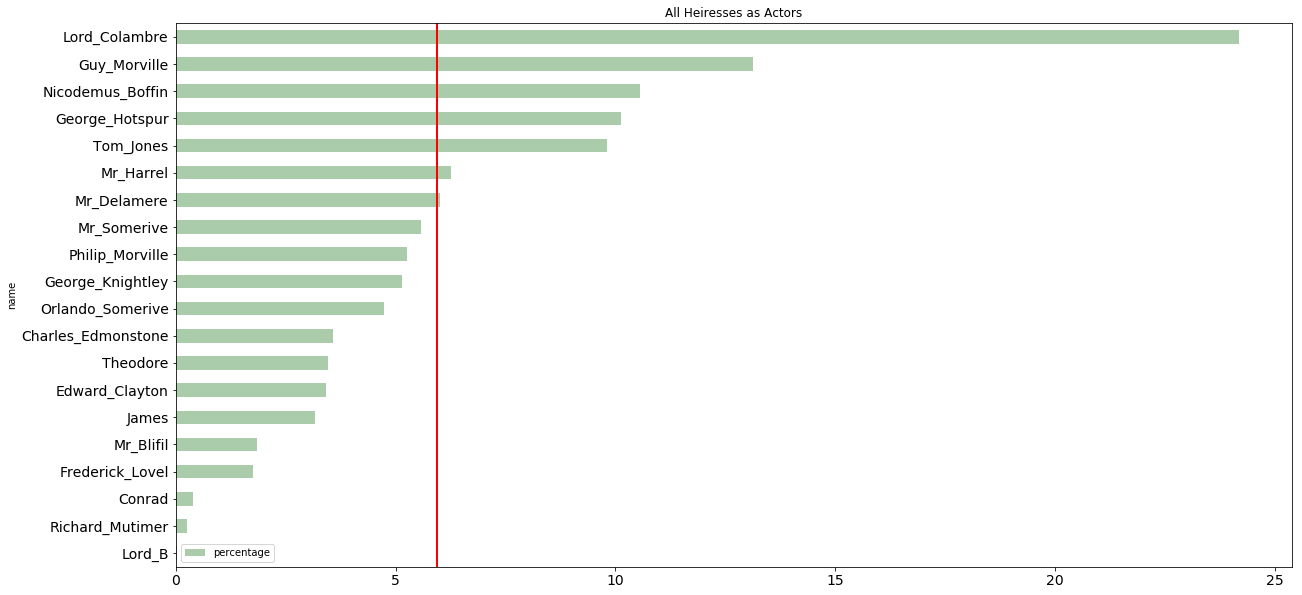

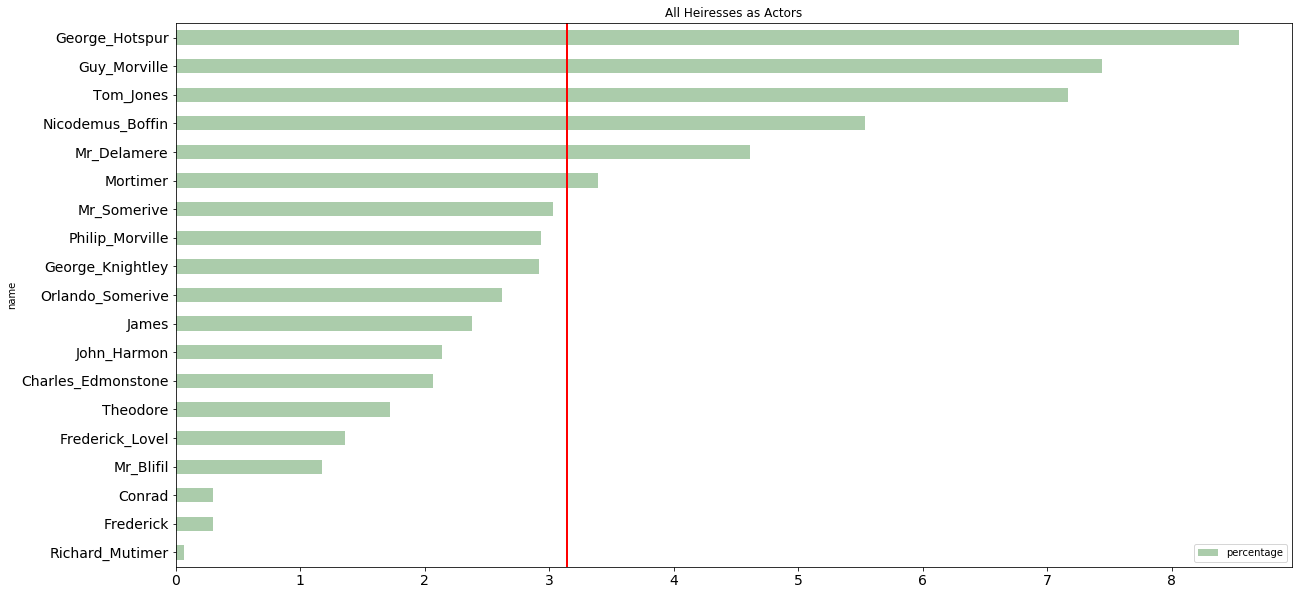

In [44]:
# Plot all max Actors across novels, with red line showing mean
ax = max_heirs_actors2.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heiresses as Actors")
ax.axvline(max_heirs_actors2["percentage"].mean(), color='red', linewidth=2)
ax.figure.savefig("../viz/heirs/no-1st-person-all-heirs-Actors.png")

# Plot all max Actors across novels, with red line showing mean
ax = max_heirs_bene2.plot(kind="barh", x="name", y="percentage",figsize=(20,10), color="darkseagreen", alpha=0.75, fontsize=14, title="All Heiresses as Actors")
ax.axvline(max_heirs_bene2["percentage"].mean(), color='red', linewidth=2)
ax.figure.savefig("../viz/heirs/no-1st-person-all-heirs-Benefactors.png")

Text(0, 0.5, 'Author Gender')

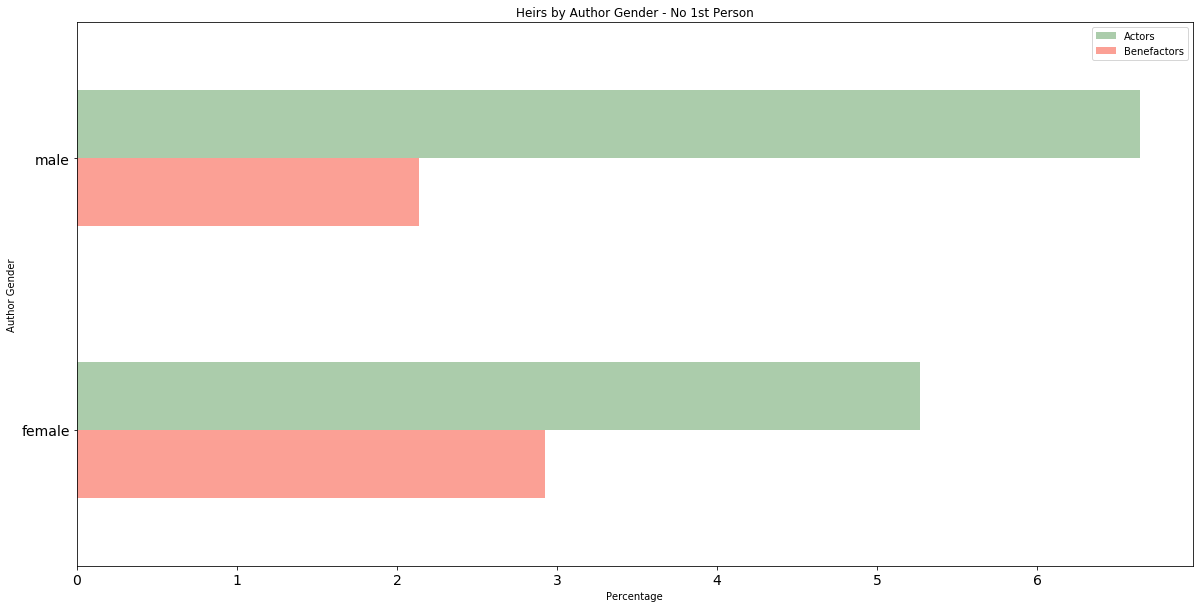

In [20]:
actor_heiress_groupby_genre = max_heirs_actors2.groupby("author").median()
bene_heiress_groupby_genre = max_heirs_bene2.groupby("author").median()

df = pd.DataFrame({"Benefactors":bene_heirs_groupby_genre["percentage"],"Actors":actor_heirs_groupby_genre["percentage"]})
df.sort_values(by = ["Actors", "Benefactors"], ascending=False)
ax = df.plot(kind="barh",figsize=(20,10), color=["salmon","darkseagreen"], fontsize=14, alpha=0.75, legend='reverse', title="Heirs by Author Gender - No 1st Person")
ax.set_xlabel("Percentage")
ax.set_ylabel("Author Gender")

#ax.figure.savefig("../viz/heirs/no-1stPer-heirs-by-author-gender.Both.png")

In [23]:
len(max_heirs_actors2)

20

In [ ]:
df